<a href="https://colab.research.google.com/github/myrondza/Data-Science-Machine-Learning-Deep-Learning-AI-Guide-Algorithms/blob/master/Stock_Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Analysis

In [0]:
import pandas_datareader.data as web
start ="2009"
end = "2019"

df = web.DataReader("AAPL", 'yahoo', start, end)
data = df["Close"]

In [11]:
data.shape

(2516,)

In [0]:
data = data[:2516]

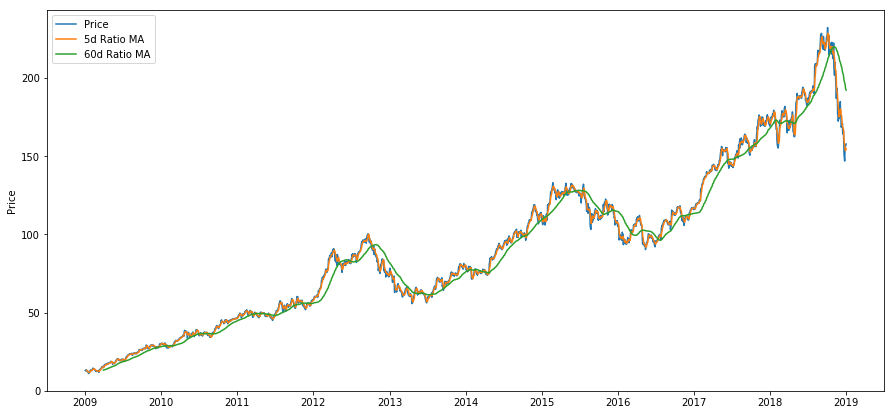

In [16]:
import matplotlib.pyplot as plt

data_mavg5 = data.rolling(window=5,
                               center=False).mean()
data_mavg60 = data.rolling(window=60,
                               center=False).mean()
std_60 = data.rolling(window=60,
                        center=False).std()
zscore_60_5 = (data_mavg5 - data_mavg60)/std_60
plt.figure(figsize=(15,7))
plt.plot(data.index, data.values)
plt.plot(data_mavg5.index, data_mavg5.values)
plt.plot(data_mavg60.index, data_mavg60.values)
plt.legend(['Price','5d Ratio MA', '60d Ratio MA'])
plt.ylabel('Price')
plt.show()

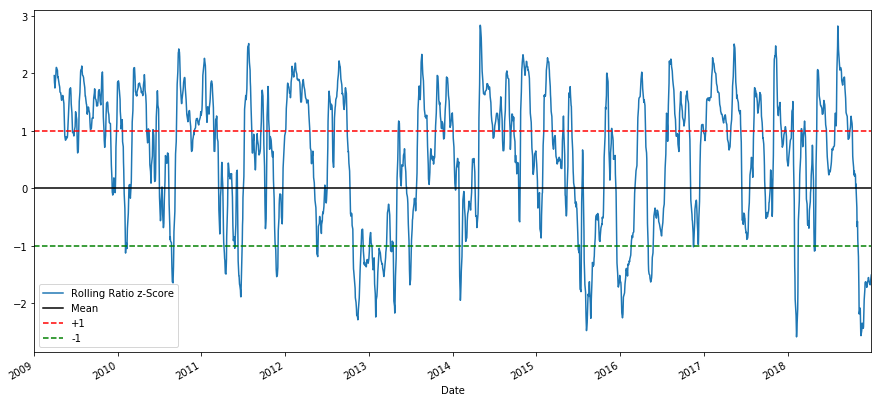

In [17]:
plt.figure(figsize=(15,7))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

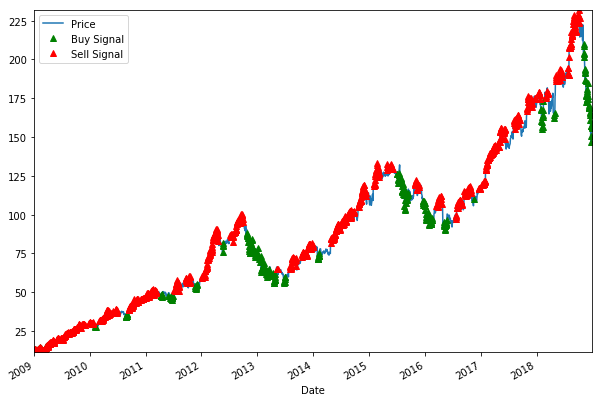

In [18]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(10,7))
data.plot()
buy = data.copy()
sell = data.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Price', 'Buy Signal', 'Sell Signal'])
plt.show()

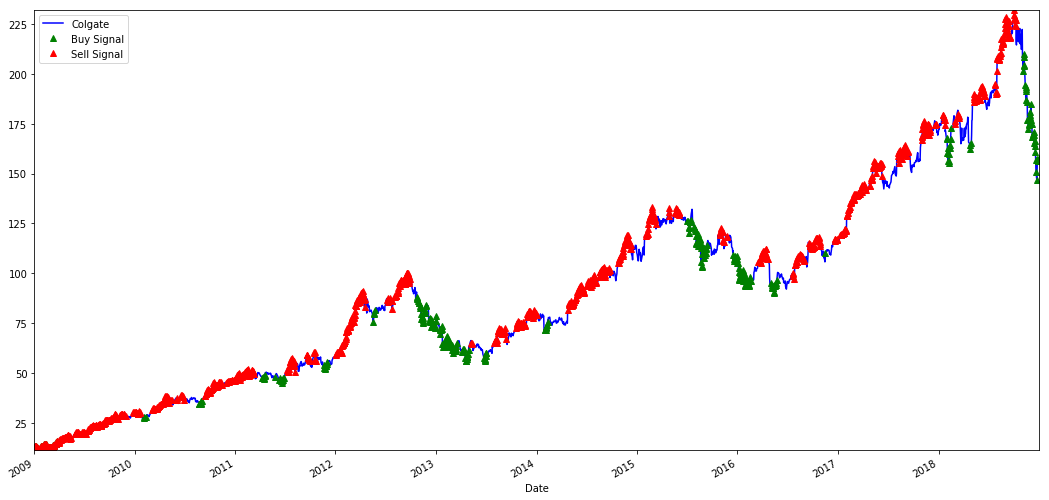

In [19]:
plt.figure(figsize=(18,9))

S = df['Close'].iloc[:2516]

S.plot(color='b')

buyR = 0*S.copy()
sellR = 0*S.copy()

buyR[buy!=0] = S[buy!=0]
sellR[sell!=0] = S[sell!=0]


buyR.plot(color='g', linestyle='None', marker='^')
sellR.plot(color='r', linestyle='None', marker='^')

x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,S.min(),S.max()))

plt.legend(['Colgate', 'Buy Signal', 'Sell Signal'])
plt.show()

In [0]:
# Trade using a simple strategy
def trade(S, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with 1 million in money and no positions
    money = 1000000
    countS = 0
    
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S[i] 
            countS += 1
            print('Selling Value %s %s %s'%(money, ratios[i], countS))
            
            
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S[i]
            countS -= 1
            print('Buying Value %s %s %s'%(money,ratios[i], countS))
            
            
        # Clear positions if the z-score between -.5 and .5
        #elif abs(zscore[i]) < 0.75:
        #    money += S[i] * countS
         #   countS = 0
         #   print('Exit pos %s %s %s %s'%(money,ratios[i], countS))
            
            
    return money

In [21]:
trade(df['Close'],30,90)

Selling Value 1000017.7742862701 17.7742862701416 1
Selling Value 1000034.844285965 17.06999969482422 2
Selling Value 1000052.4085712433 17.564285278320312 3
Selling Value 1000069.8971424103 17.488571166992188 4
Selling Value 1000087.9899997711 18.092857360839844 5
Selling Value 1000106.1971435547 18.207143783569336 6
Selling Value 1000124.178571701 17.981428146362305 7
Selling Value 1000141.9185714722 17.739999771118164 8
Selling Value 1000159.4185714722 17.5 9
Selling Value 1000178.1014289856 18.682857513427734 10
Selling Value 1000197.1085720062 19.007143020629883 11
Selling Value 1000216.4042854309 19.295713424682617 12
Selling Value 1000235.8057136536 19.40142822265625 13
Selling Value 1000255.7128562927 19.907142639160156 14
Selling Value 1000275.6399993896 19.927143096923828 15
Selling Value 1000295.7757129669 20.135713577270508 16
Selling Value 1000316.309999466 20.534286499023438 17
Selling Value 1000336.977142334 20.667142868041992 18
Selling Value 1000357.527141571 20.549999

1051154.049993515